In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
5,2020-03-30,France,43022.0,40174.0,2715.0,2606.0,2848.0,109.0
6,2020-03-30,China,82601.0,82463.0,3308.0,3311.0,138.0,-3.0
7,2020-03-30,Italy,99266.0,97689.0,11095.0,10781.0,1577.0,314.0
8,2020-03-30,Spain,81599.0,78797.0,6594.0,6528.0,2802.0,66.0
9,2020-03-30,United States,148230.0,143025.0,2840.0,2509.0,5205.0,331.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2367.5722772277227
RMSE =  5174.274525701814


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  373.2277227722772
RMSE =  828.5825400903486


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  11285.557692307691
RMSE =  13411.700804922886
-- World performances for deaths --
MAPE =  1755.7115384615386
RMSE =  2145.846807027652


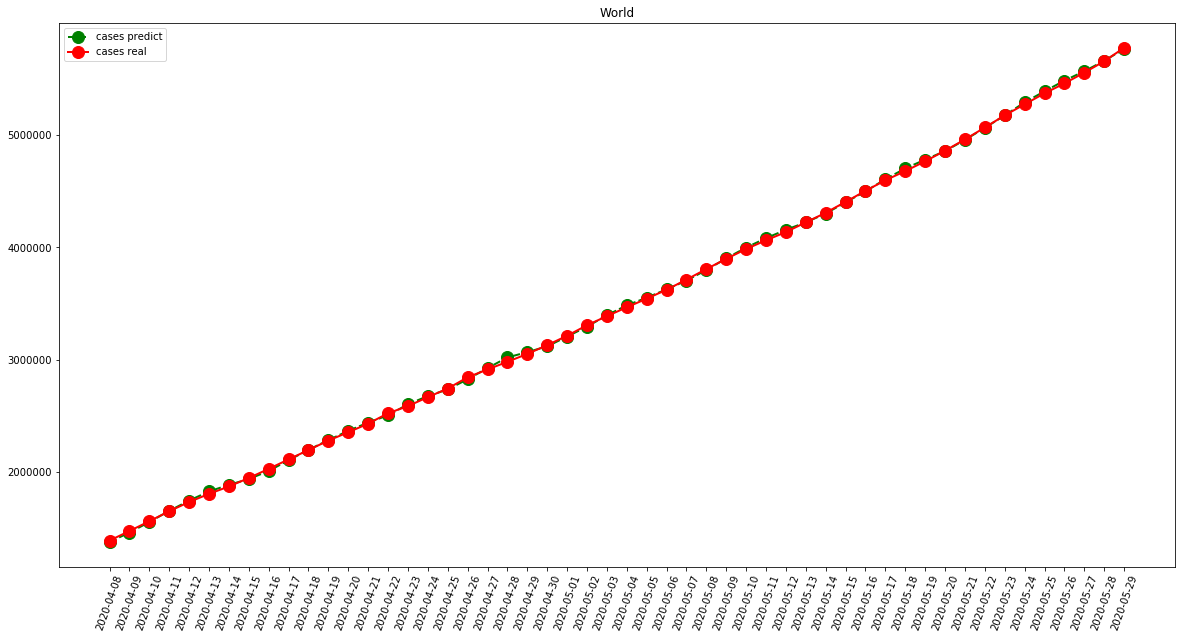

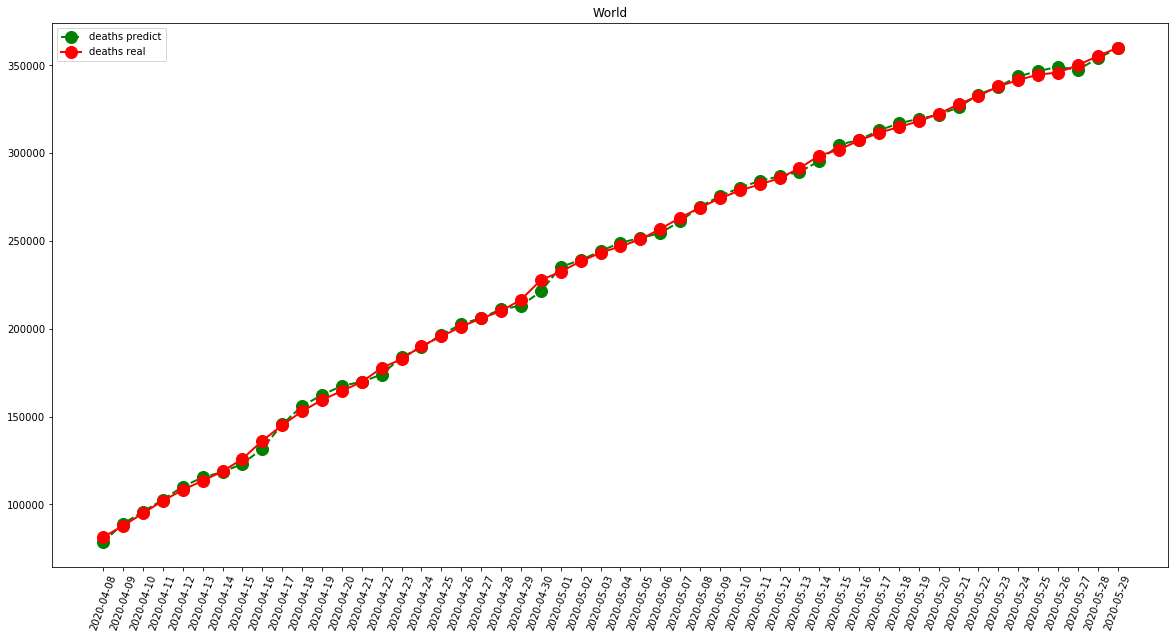

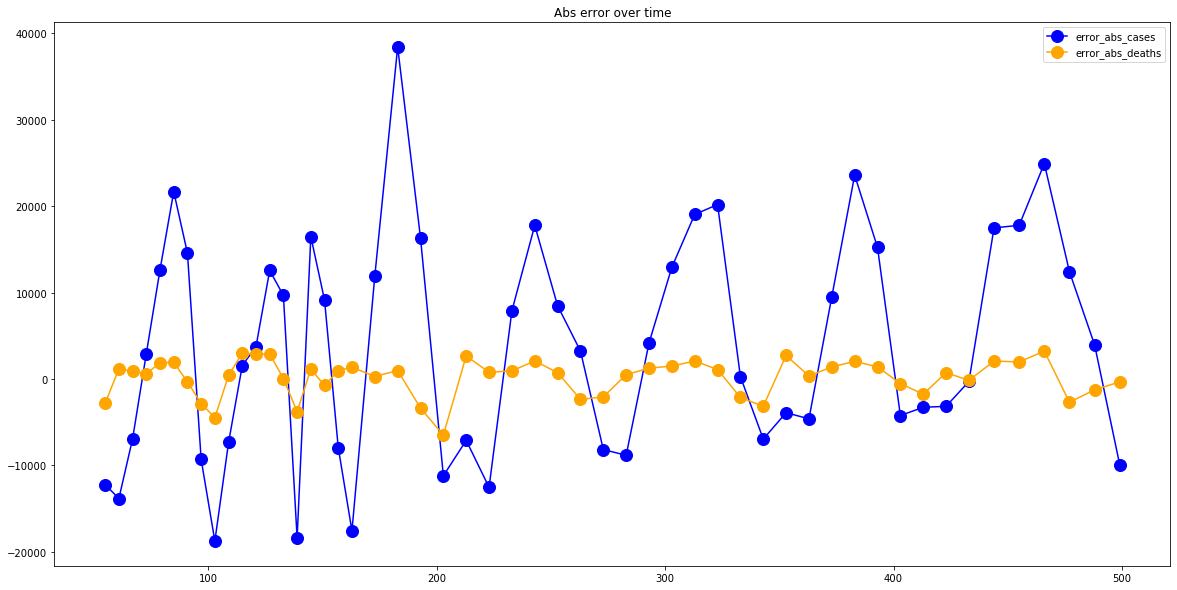

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  1135.8225806451612
RMSE =  1775.9149345727992
-- France performances for deaths --
MAPE =  268.0
RMSE =  424.5698392338966


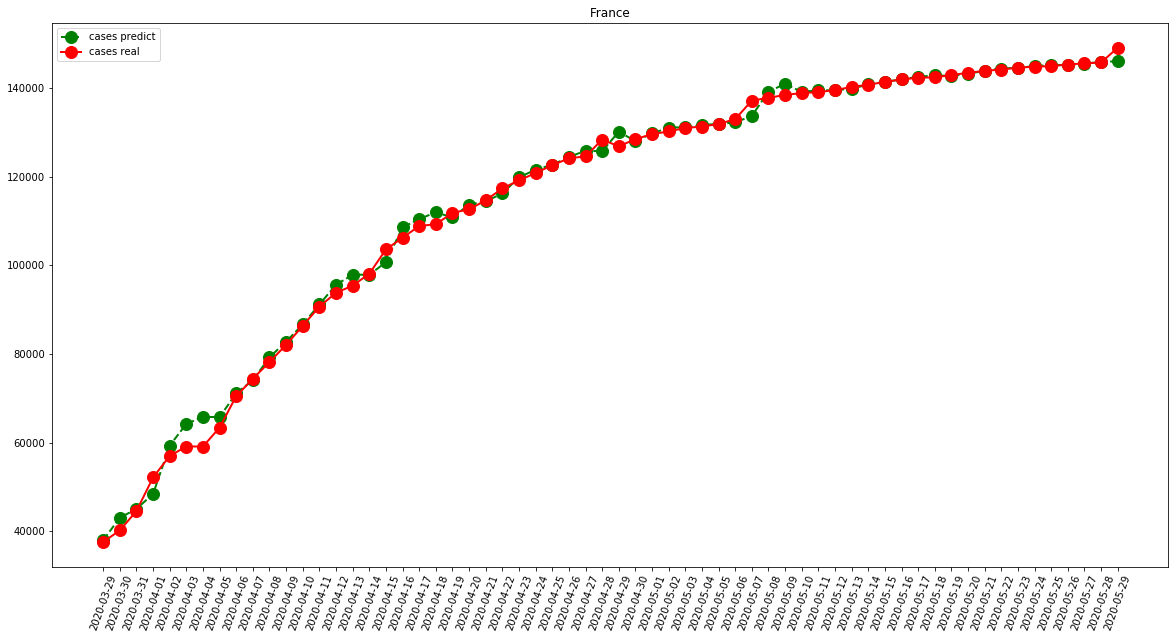

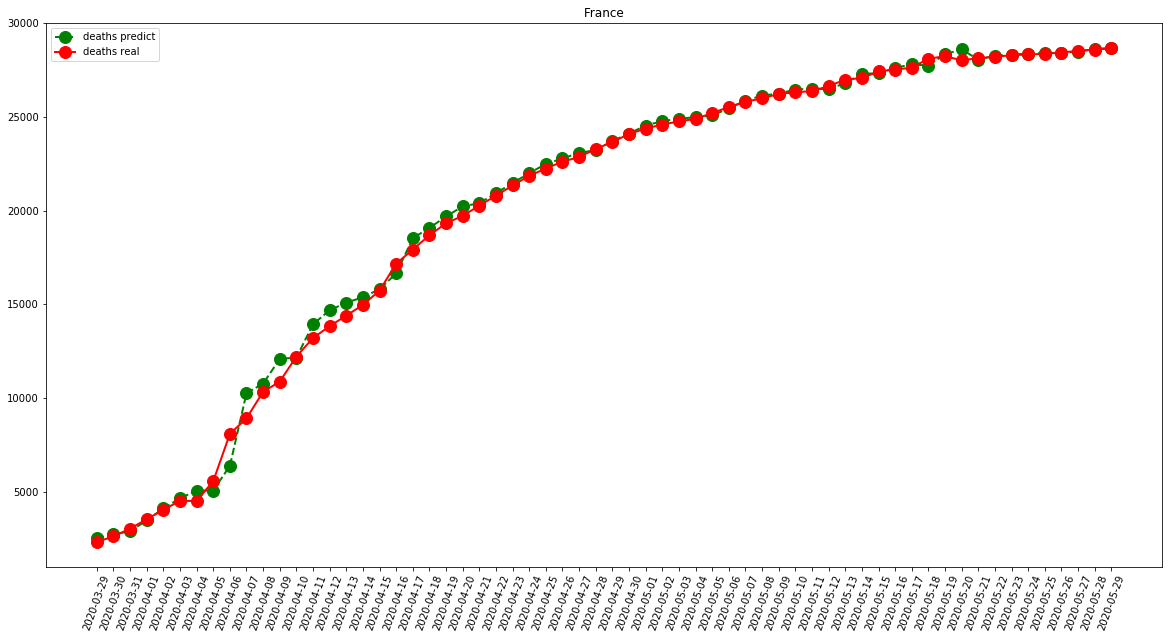

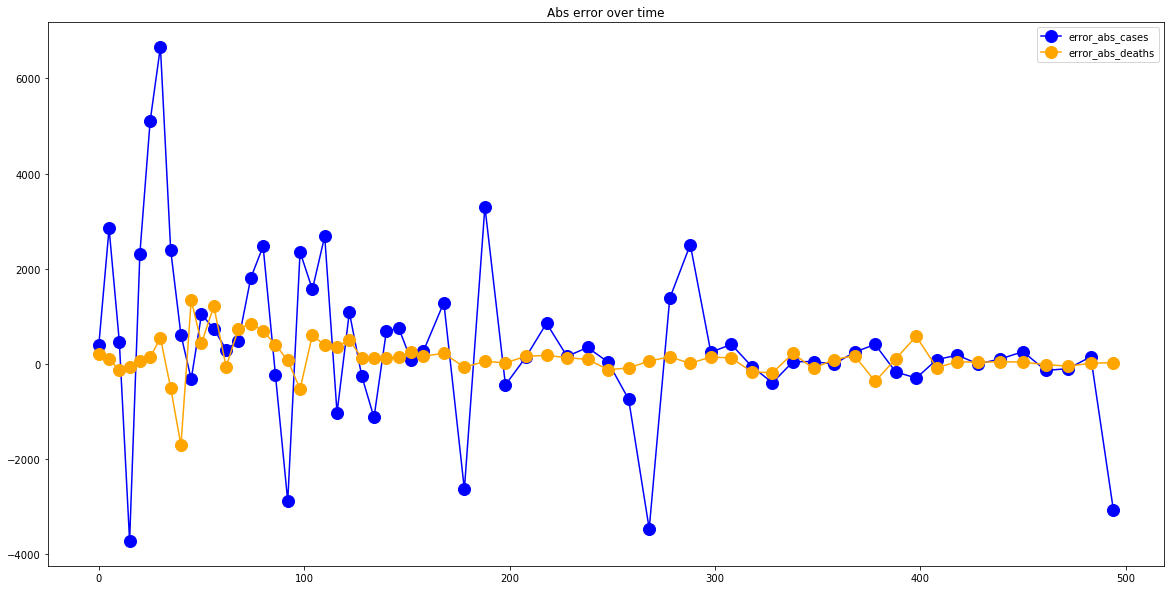

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  491.0967741935484
RMSE =  667.7589385399494
-- Italy performances for deaths --
MAPE =  139.48387096774192
RMSE =  374.62450017188183


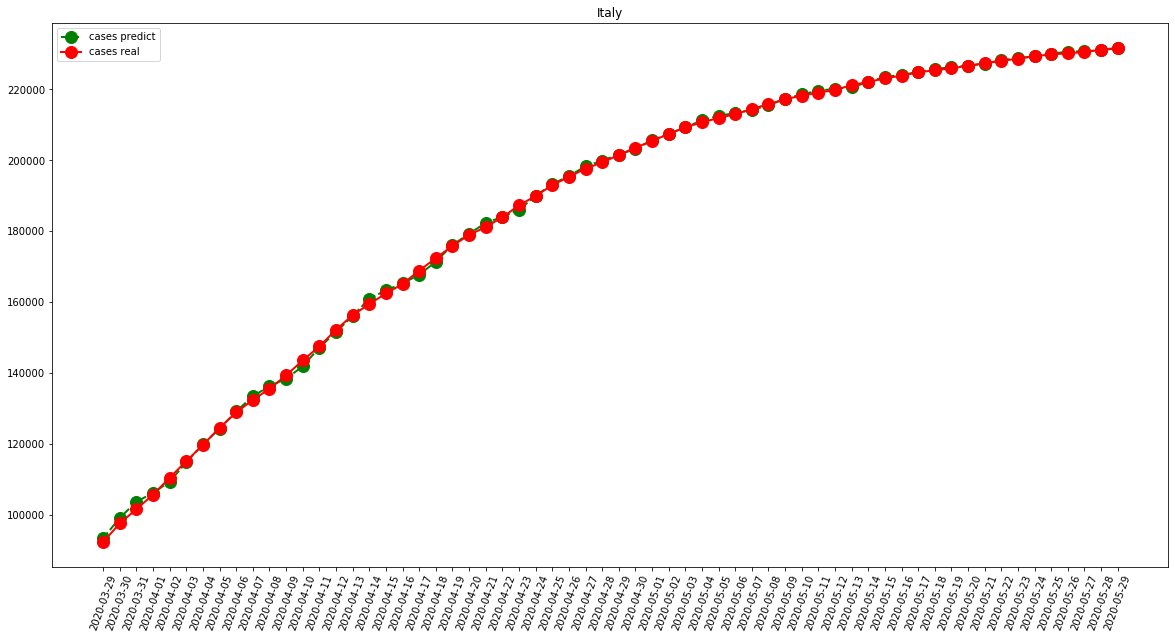

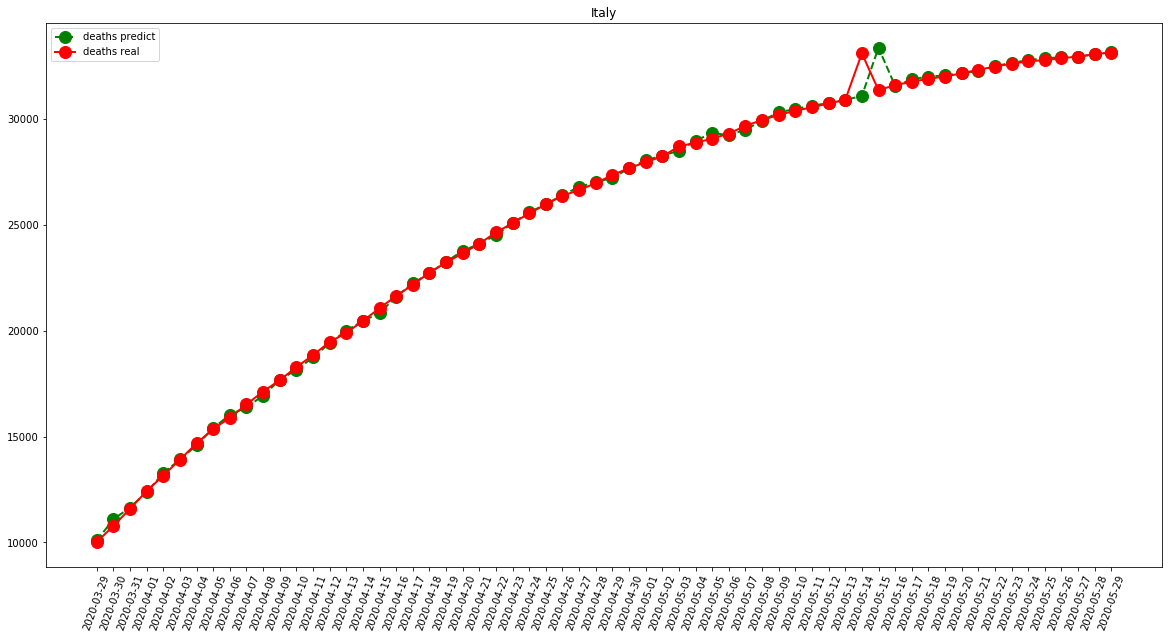

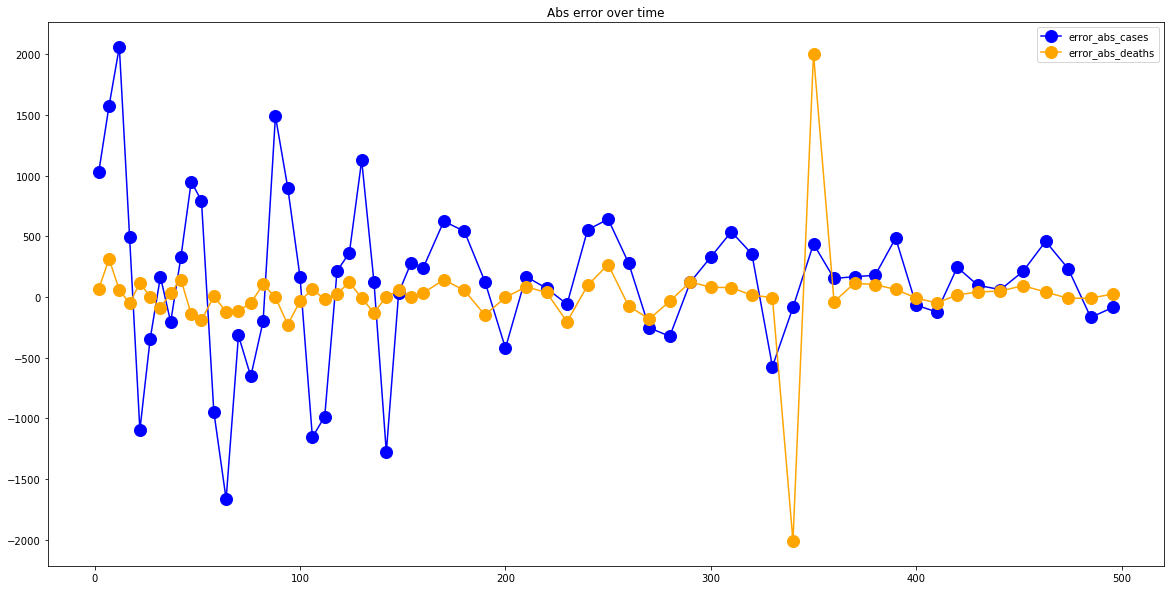

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1251.9354838709678
RMSE =  2591.4033687087076
-- Spain performances for deaths --
MAPE =  197.1451612903226
RMSE =  397.35953087121686


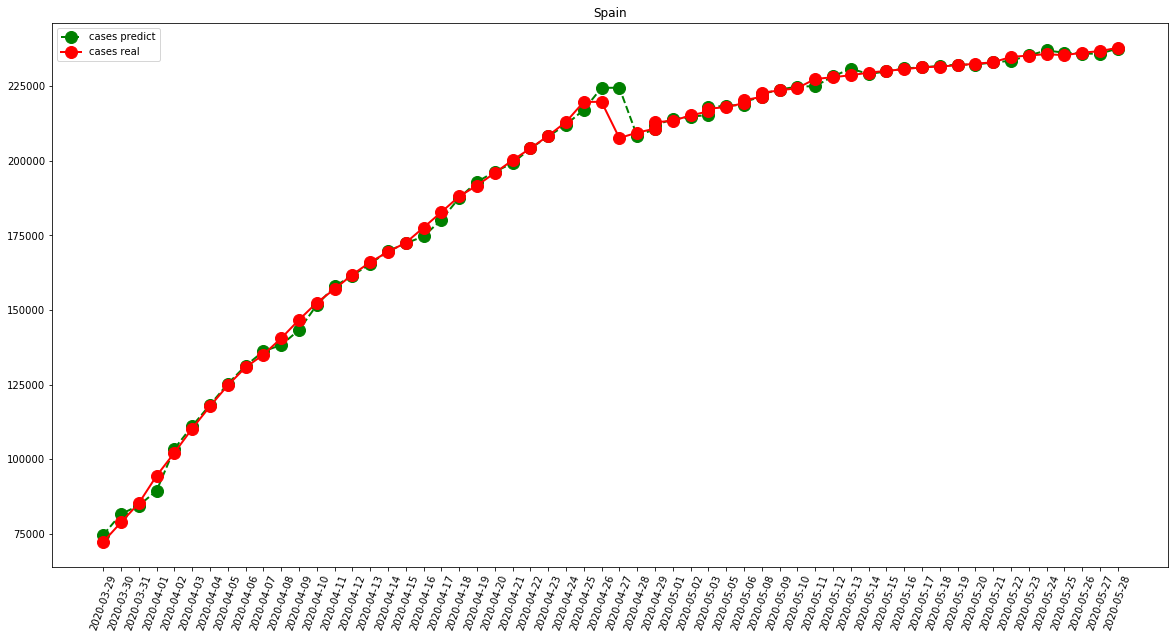

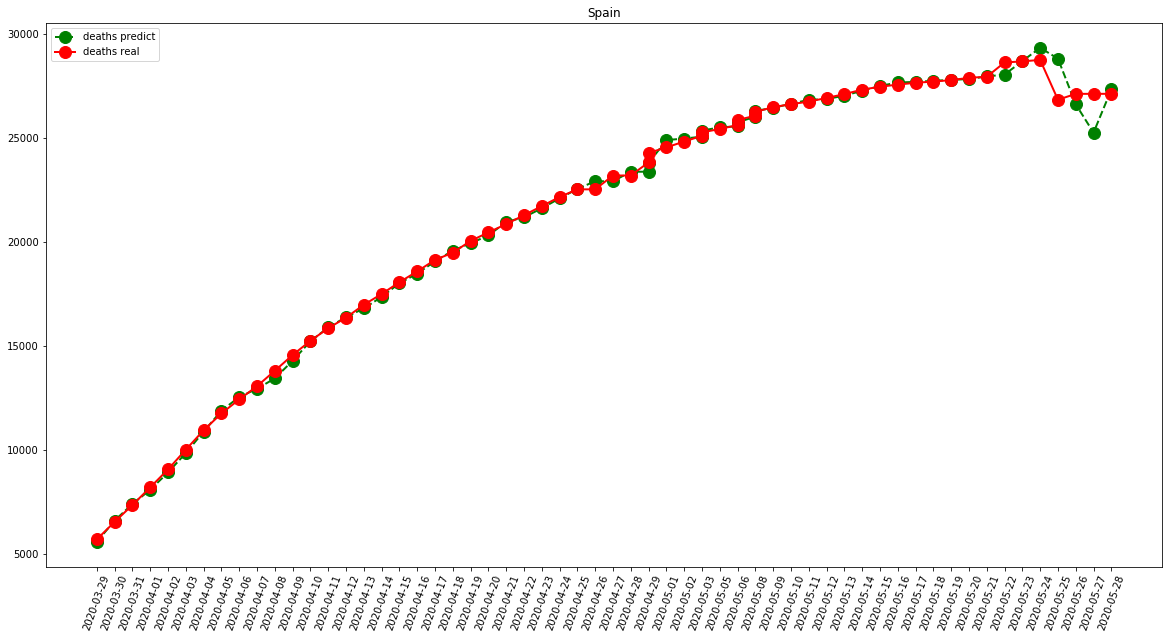

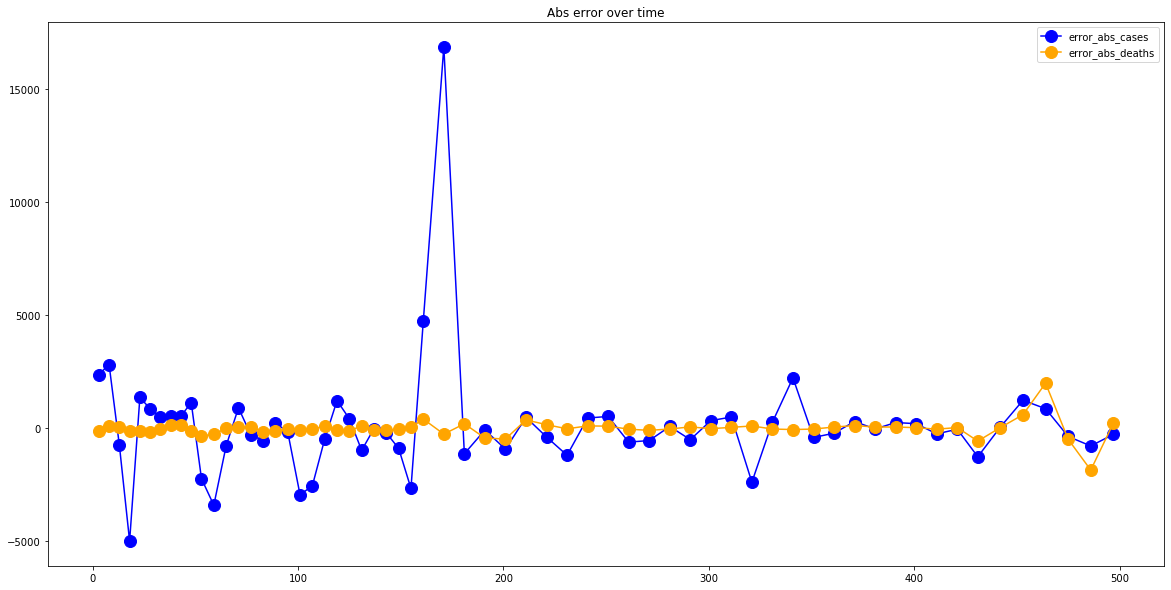

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  5095.193548387097
RMSE =  7191.533835227768
-- United States performances for deaths --
MAPE =  618.1935483870968
RMSE =  900.9572686870338


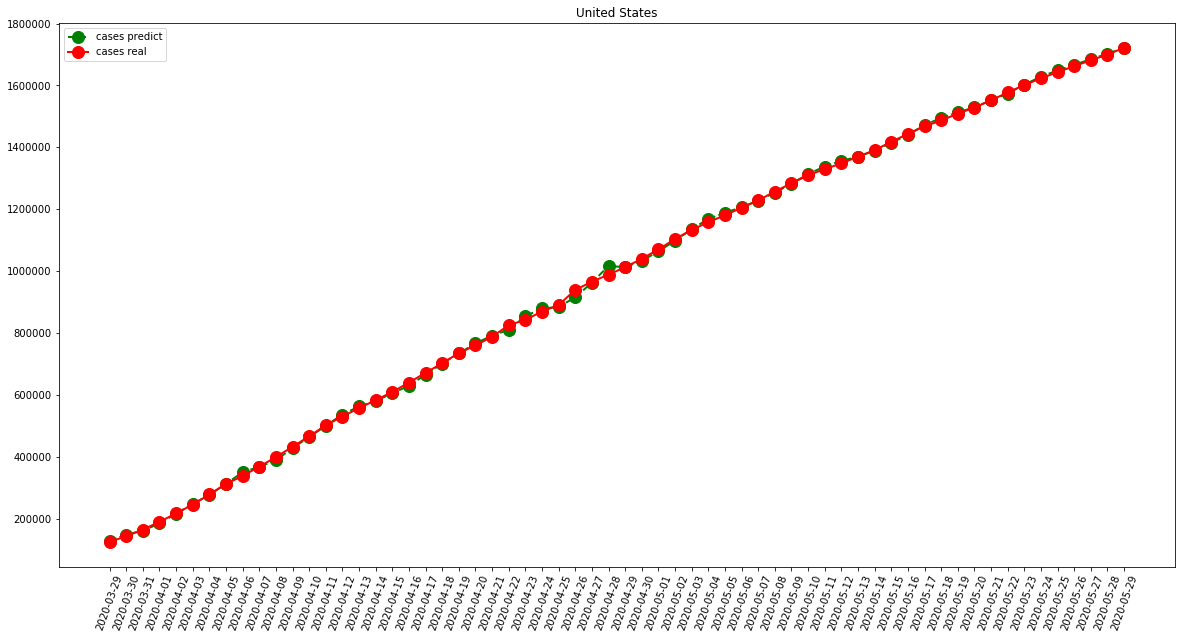

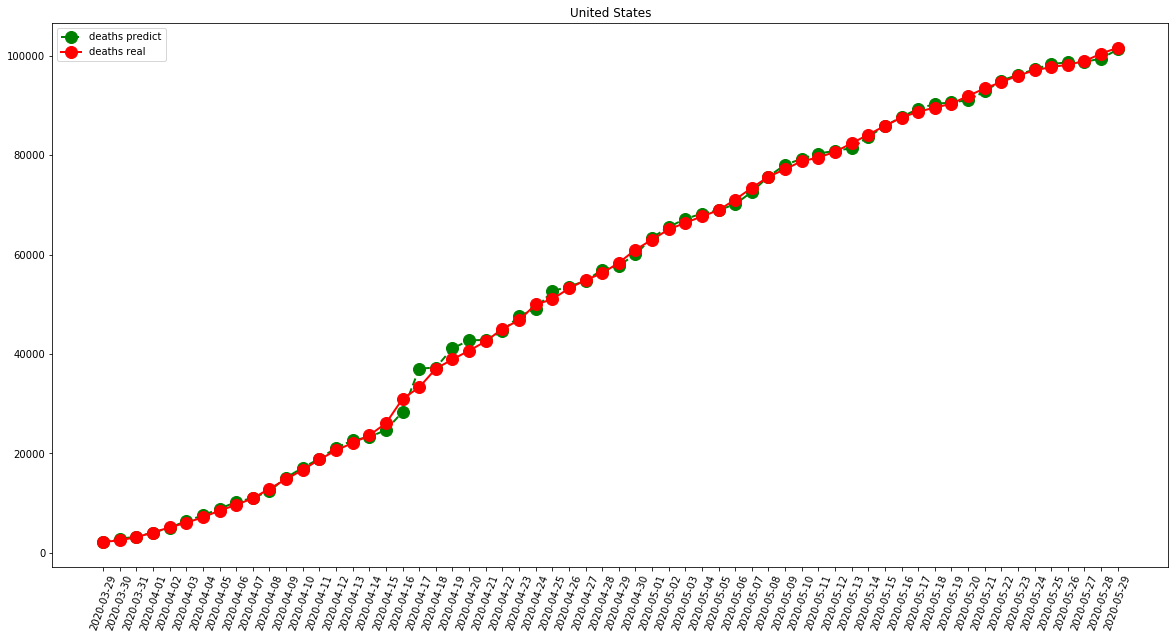

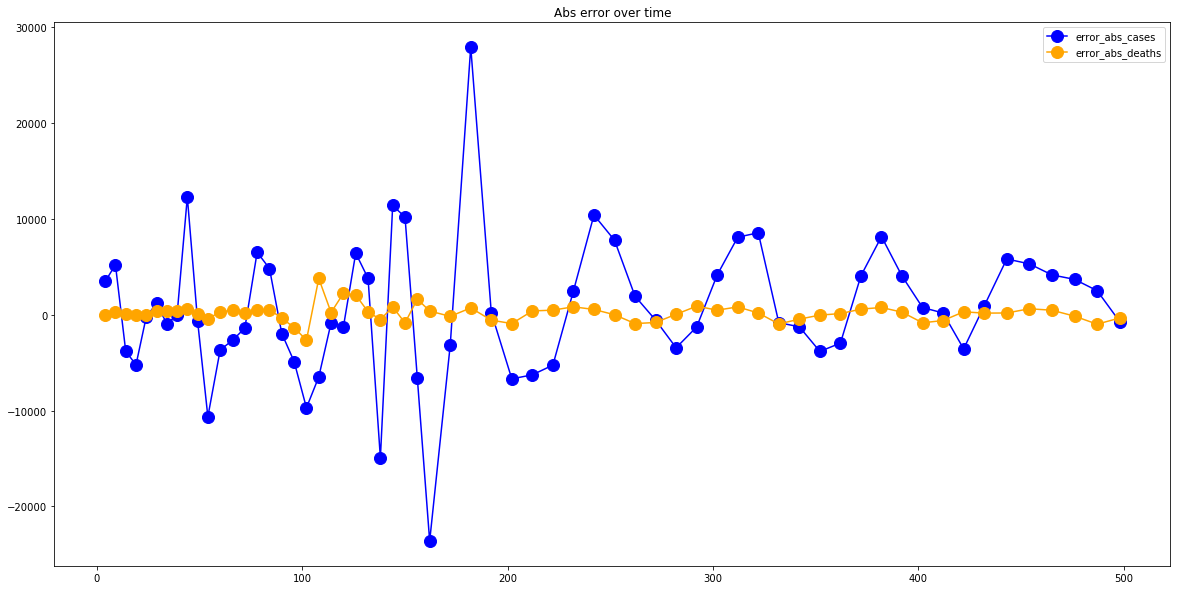

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  117.1774193548387
RMSE =  145.44420280311024
-- China performances for deaths --
MAPE =  54.53225806451613
RMSE =  199.0879607837507


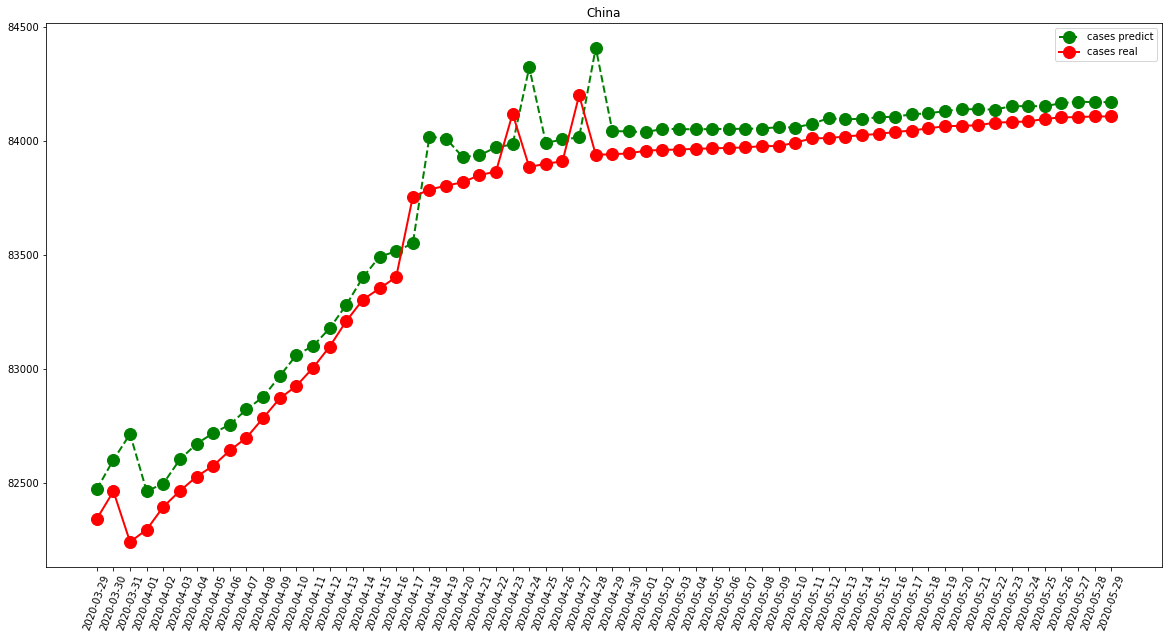

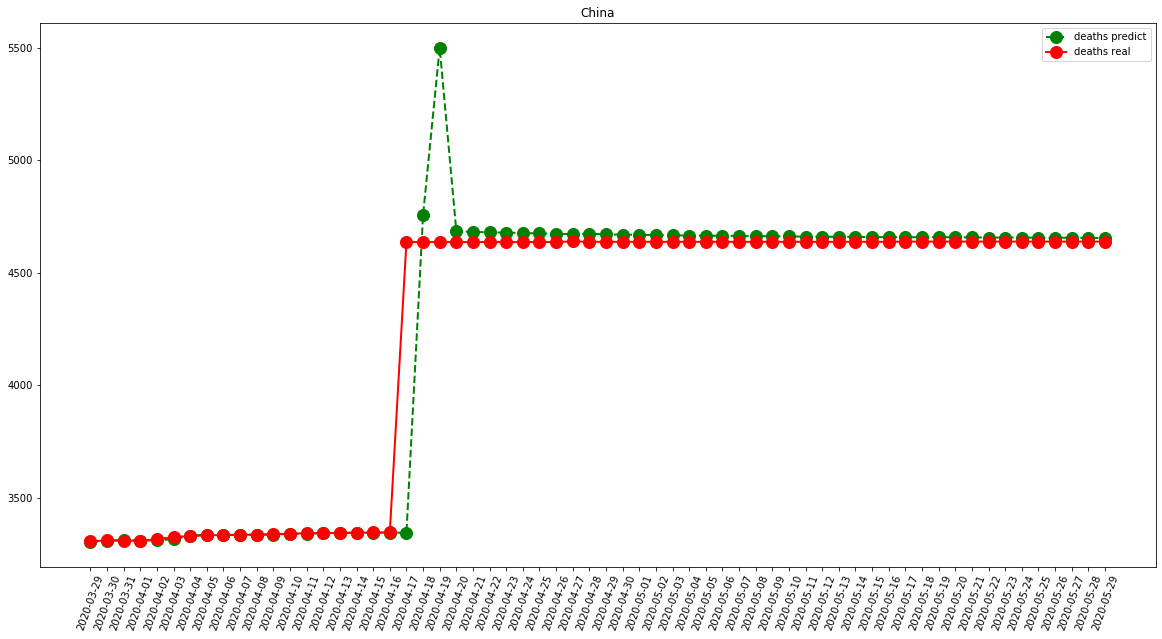

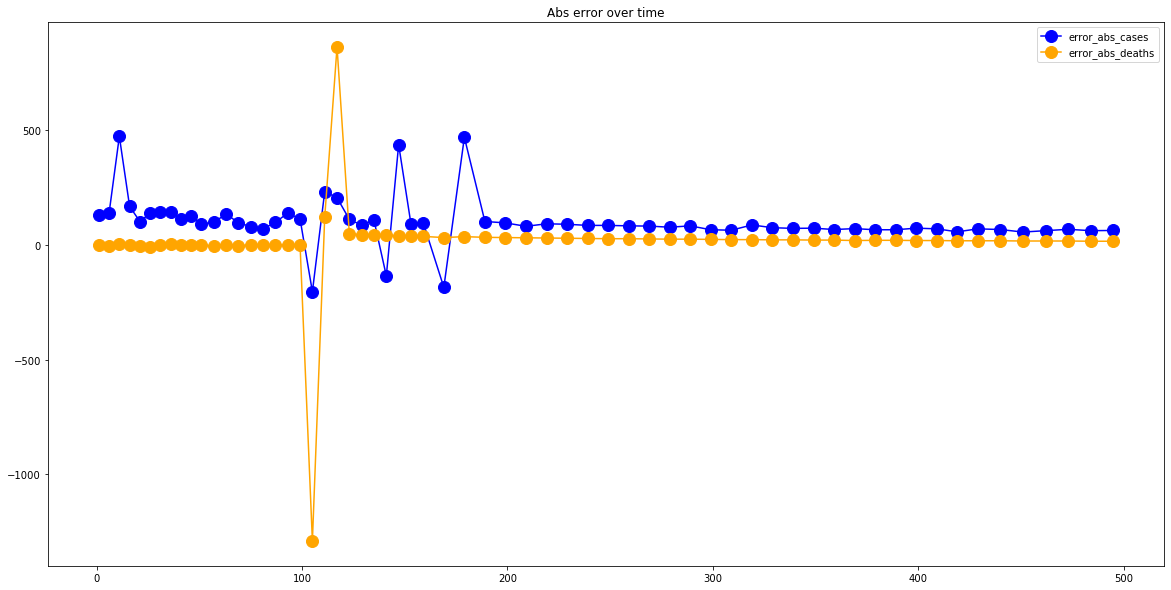

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  1188.0294117647059
RMSE =  1540.892550744917
-- United Kingdom performances for deaths --
MAPE =  373.02941176470586
RMSE =  824.3976945767919


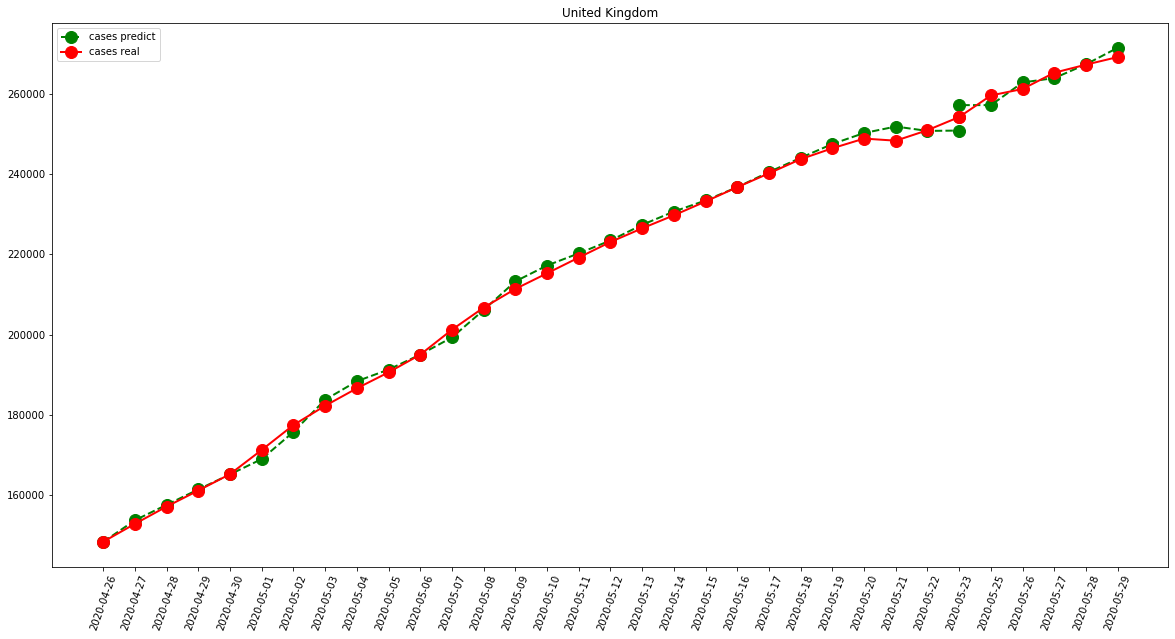

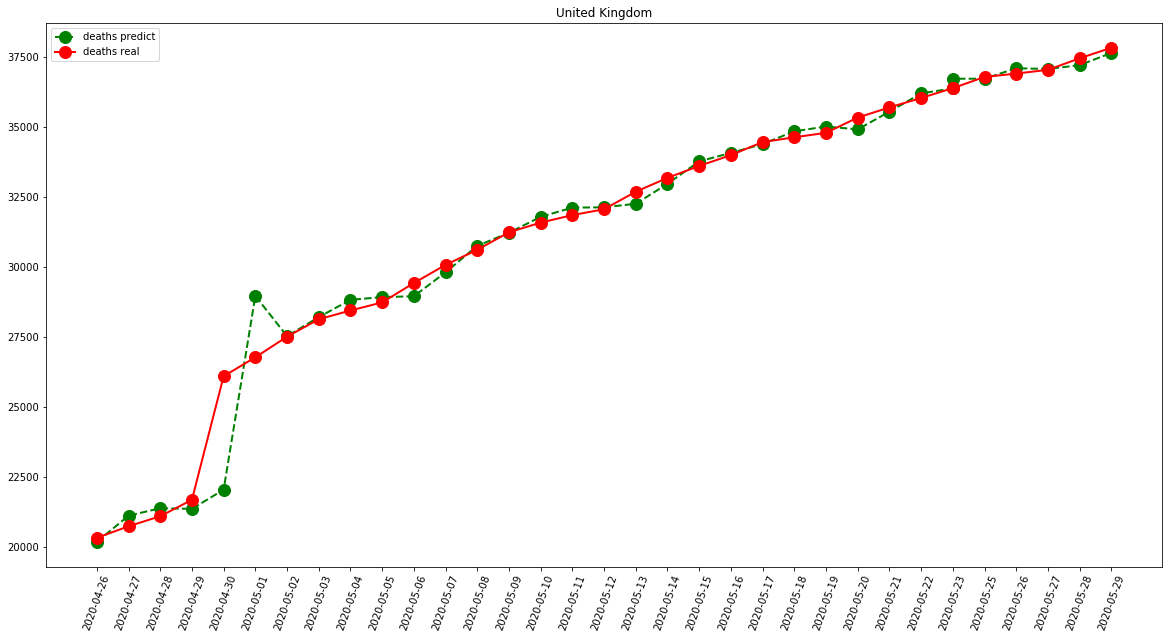

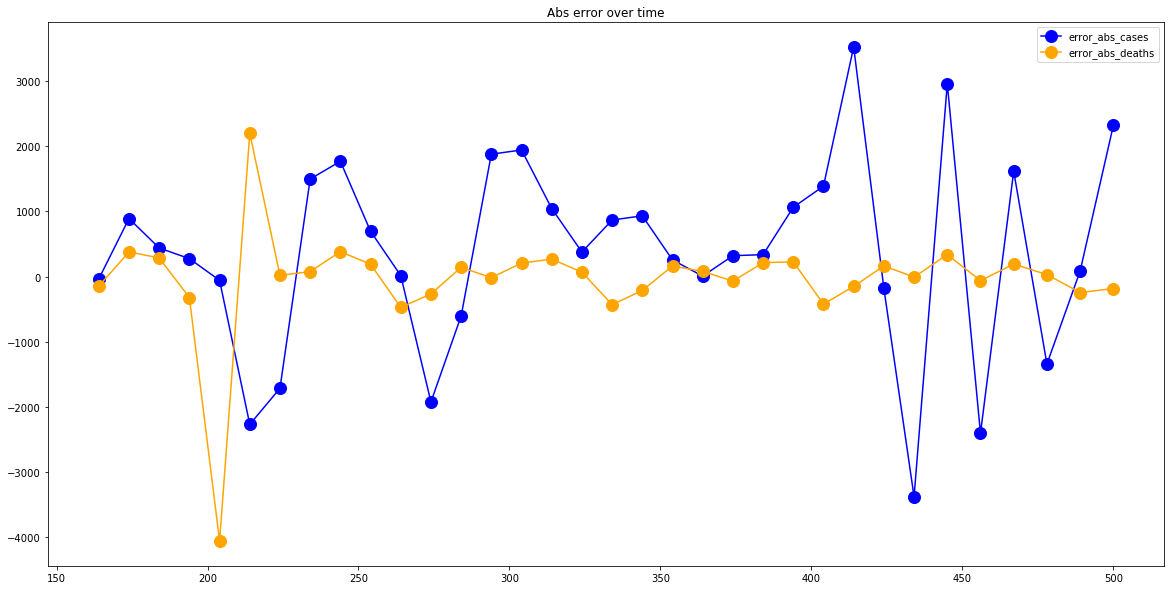

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  425.70588235294116
RMSE =  570.0249736531157
-- Germany performances for deaths --
MAPE =  50.88235294117647
RMSE =  72.68627186509883


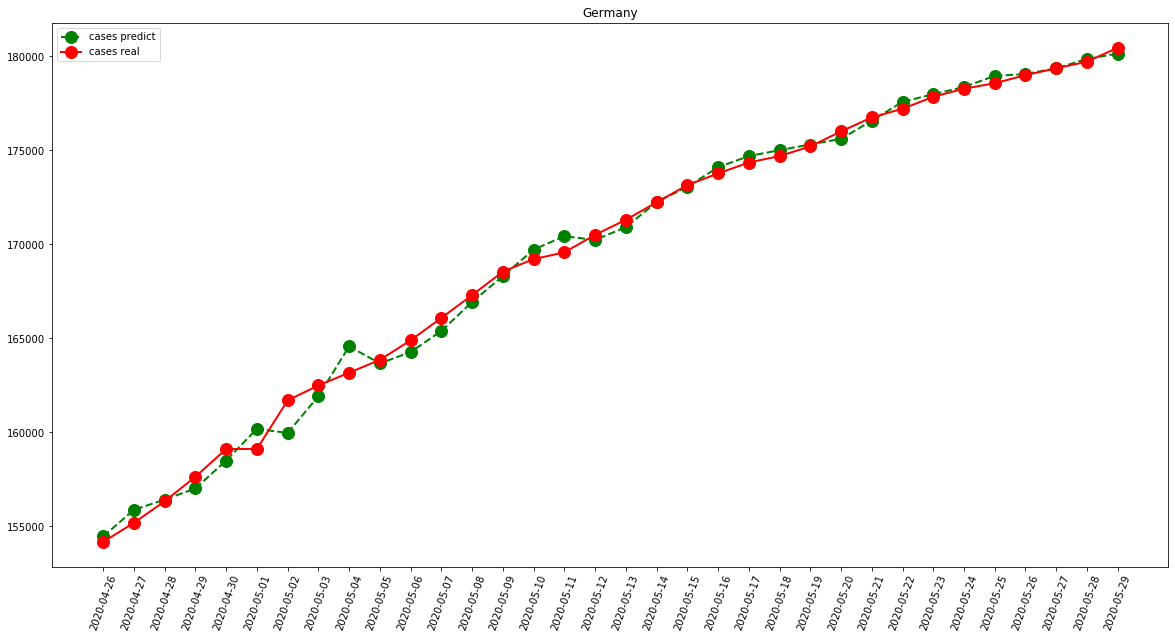

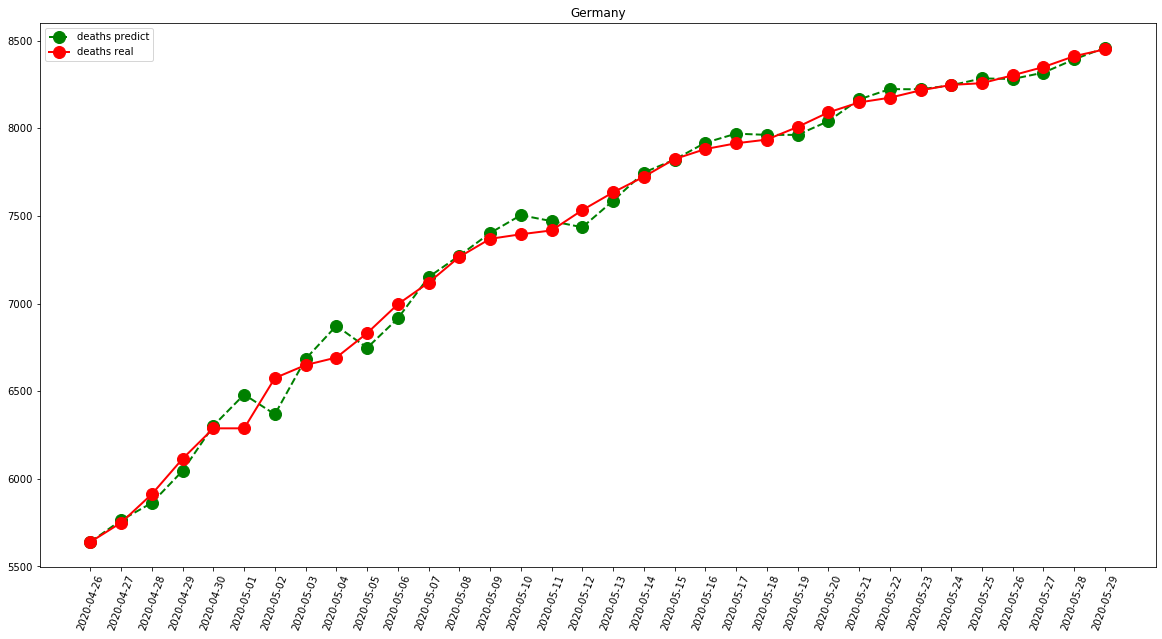

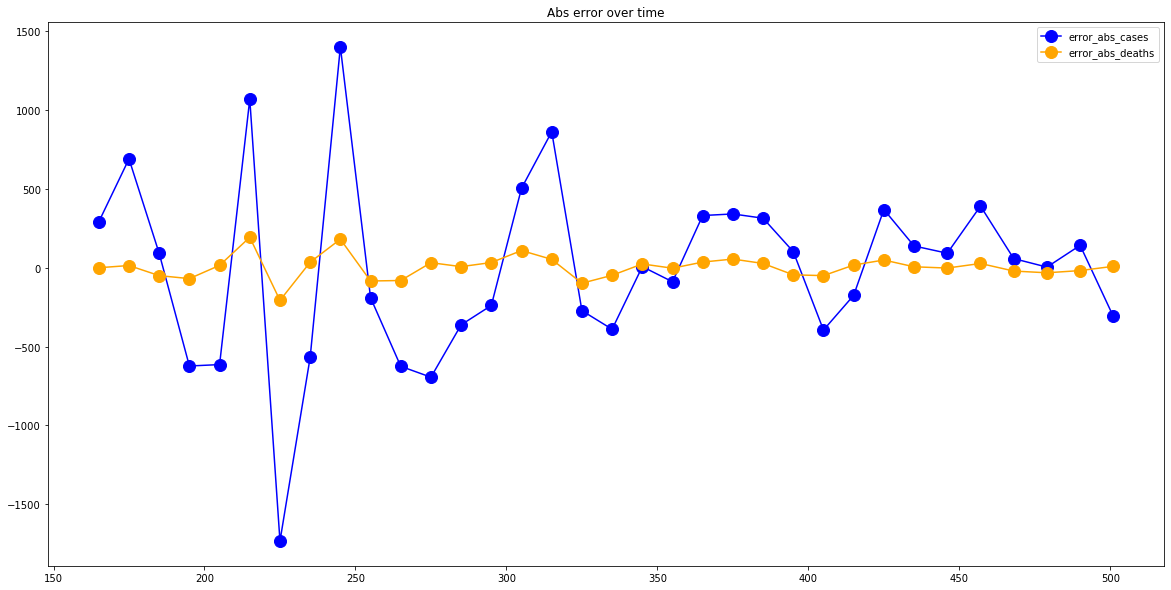

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  176.41176470588235
RMSE =  231.65250344630678
-- Iran performances for deaths --
MAPE =  13.0
RMSE =  16.453142020688365


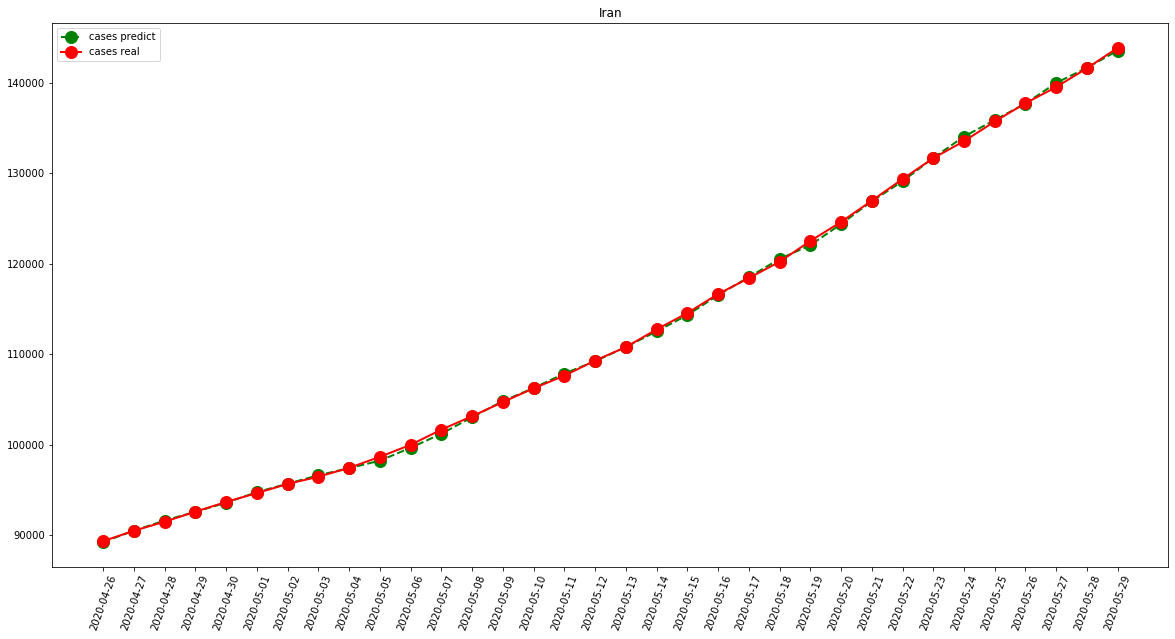

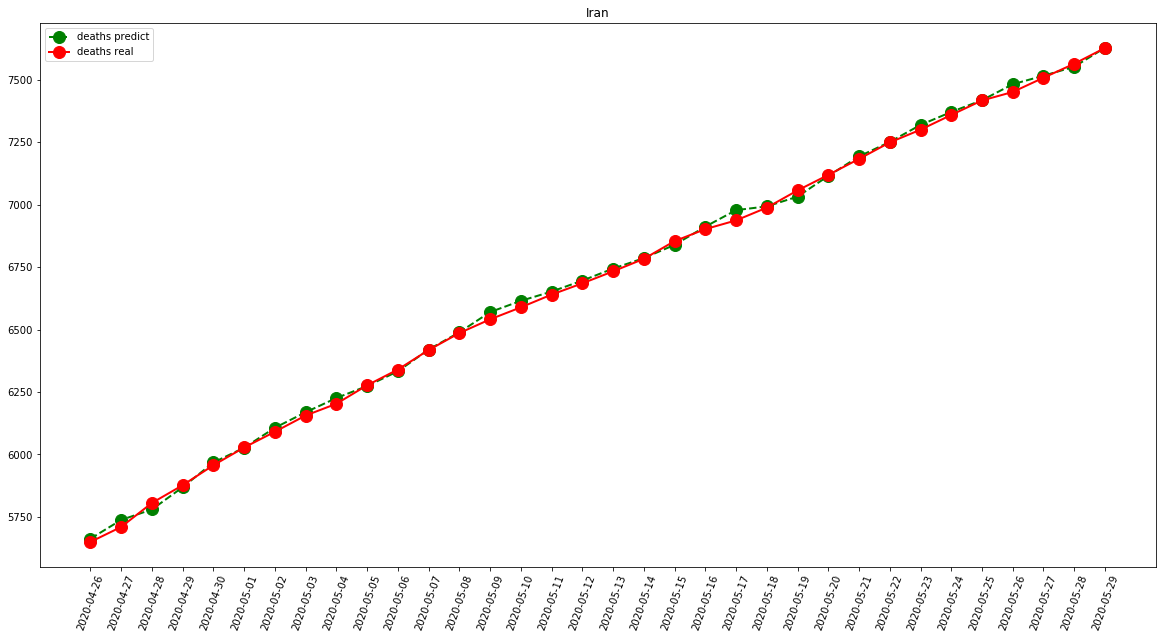

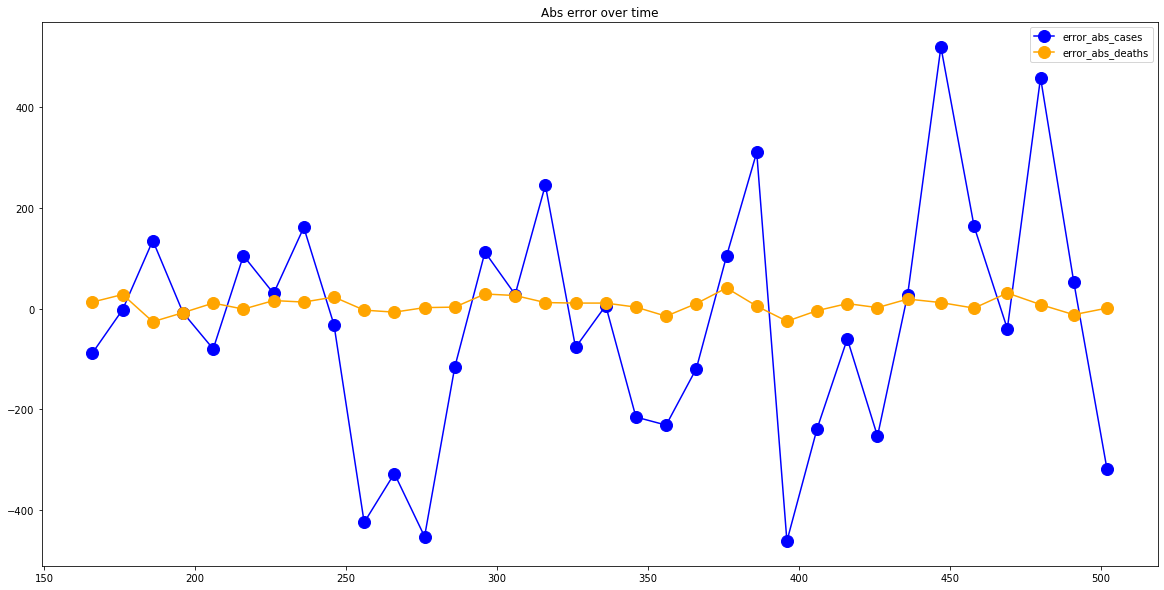

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  359.3235294117647
RMSE =  495.2488679204331
-- Turkey performances for deaths --
MAPE =  49.61764705882353
RMSE =  173.8796913351974


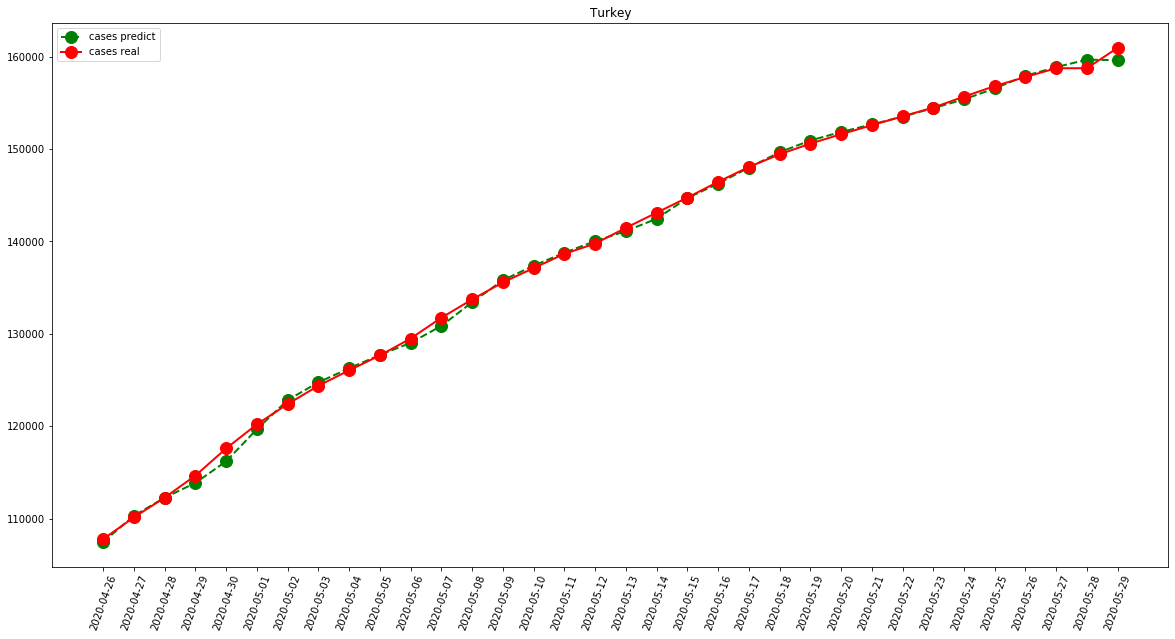

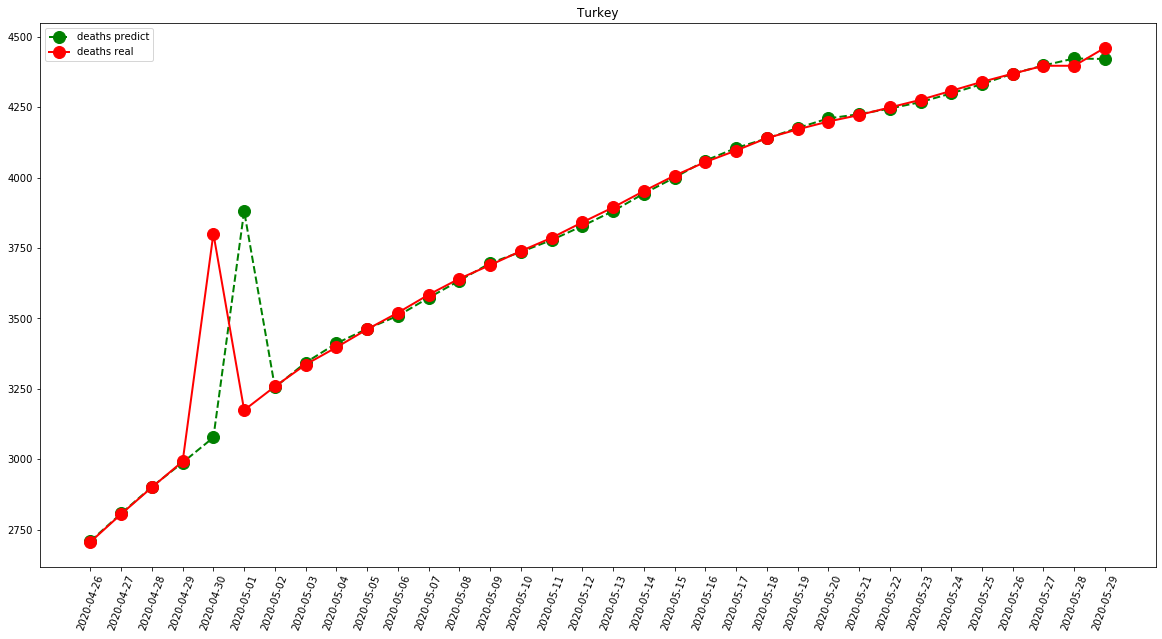

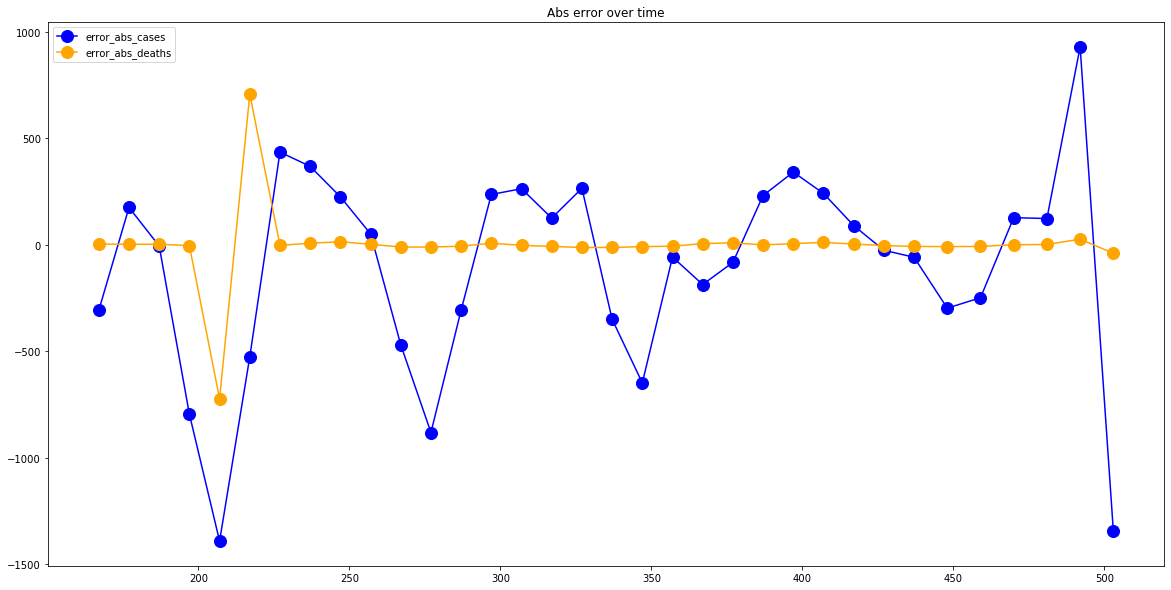

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  4862.428571428572
RMSE =  5576.415835590866
-- Brazil performances for deaths --
MAPE =  206.42857142857142
RMSE =  264.45874644531716


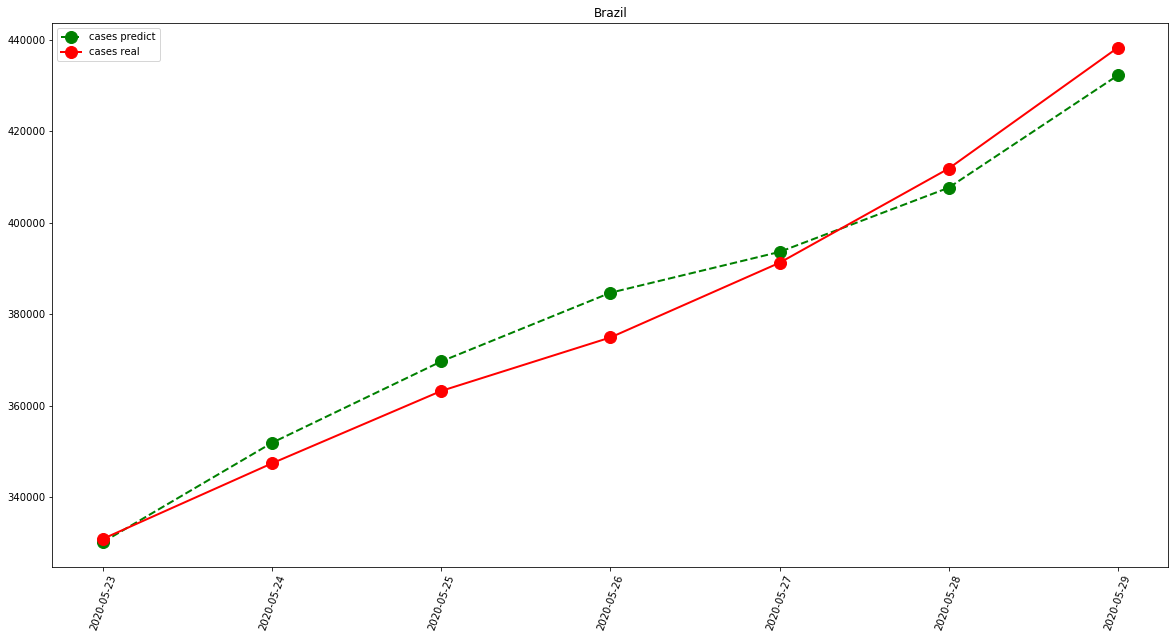

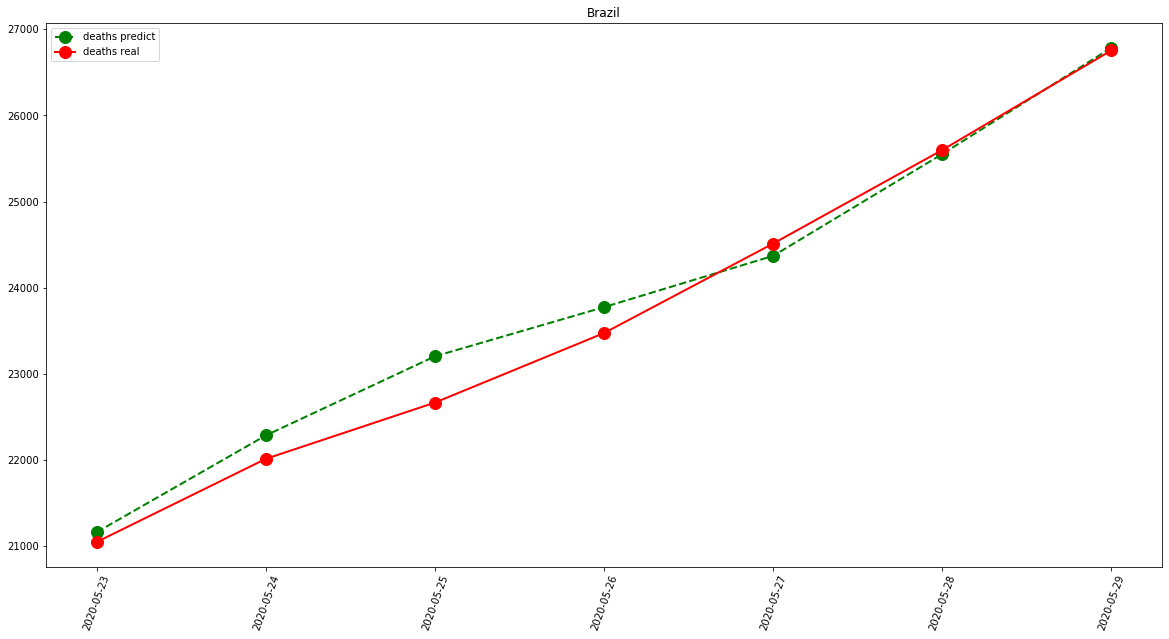

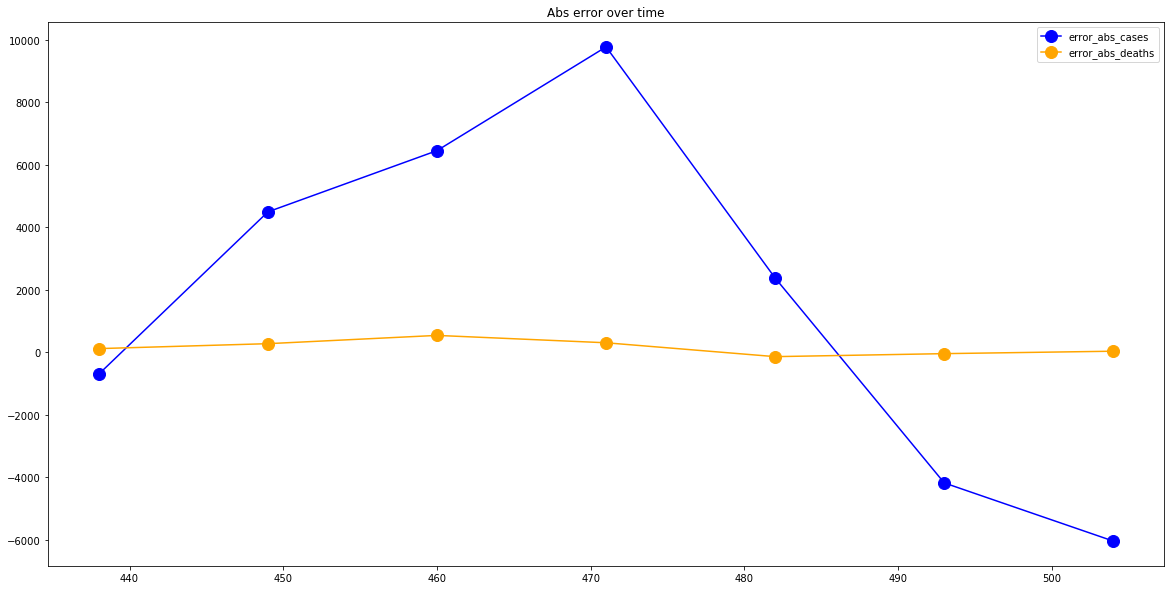

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)